<a href="https://colab.research.google.com/github/Blackman9t/Python_-_Statistics_for_Financial_Analysis/blob/master/wk2_3_Models%2Bof%2BStock%2BReturn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Models of Stock Return

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [0]:
ms = pd.DataFrame.from_csv('https://raw.githubusercontent.com/Blackman9t/Python_-_Statistics_for_Financial_Analysis/master/microsoft.csv')
ms.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """Entry point for launching an IPython kernel.


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-31,46.730000,47.439999,46.450001,46.450001,42.848763,21552500
2015-01-02,46.660000,47.419998,46.540001,46.759998,43.134731,27913900
2015-01-05,46.369999,46.730000,46.250000,46.330002,42.738068,39673900
2015-01-06,46.380001,46.750000,45.540001,45.650002,42.110783,36447900
2015-01-07,45.980000,46.459999,45.490002,46.230000,42.645817,29114100


## Distribution of Log return

In [0]:
# let play around with ms data by calculating the log daily return
ms['LogReturn'] = np.log(ms['Close']).shift(-1) - np.log(ms['Close'])

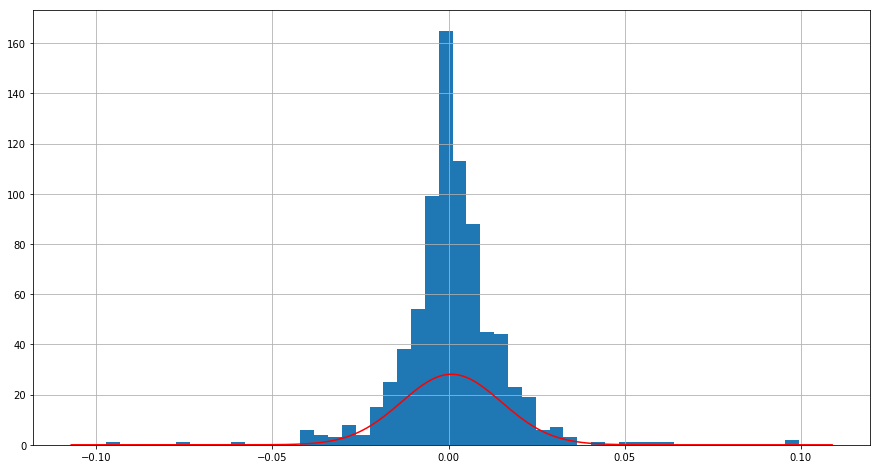

In [0]:
# Plot a histogram to show the distribution of log return of Microsoft's stock. 
# You can see it is very close to a normal distribution
from scipy.stats import norm
mu = ms['LogReturn'].mean()
sigma = ms['LogReturn'].std(ddof=1)

density = pd.DataFrame()
density['x'] = np.arange(ms['LogReturn'].min()-0.01, ms['LogReturn'].max()+0.01, 0.001)
density['pdf'] = norm.pdf(density['x'], mu, sigma)

ms['LogReturn'].hist(bins=50, figsize=(15, 8))
plt.plot(density['x'], density['pdf'], color='red')
plt.show()

## Calculate the probability of the stock price will drop over a certain percentage in a day

In [0]:
# probability that the stock price of microsoft will drop over 5% in a day
prob_return1 = norm.cdf(-0.05, mu, sigma)
print('The Probability is ', prob_return1)

The Probability is  0.00017118482608677817


In [0]:
# Now is your turn, calculate the probability that the stock price of microsoft will drop over 10% in a day
prob_return1 = None
print('The Probability is ', prob_return1)

The Probability is  None


**Expected Output: ** The Probability is  6.05677563486e-13

## Calculate the probability of the stock price will drop over a certain percentage in a year

In [0]:
# drop over 40% in 220 days
mu220 = 220*mu
sigma220 = (220**0.5) * sigma
print('The probability of dropping over 40% in 220 days is ', norm.cdf(-0.4, mu220, sigma220))

The probability of dropping over 40% in 220 days is  0.002912363313330548


In [0]:
# drop over 20% in 220 days
mu220 = 220*mu
sigma220 = (220**0.5) * sigma
drop20 = None
print('The probability of dropping over 20% in 220 days is ', drop20)

The probability of dropping over 20% in 220 days is  None


**Expected Output: ** The probability of dropping over 20% in 220 days is  0.0353523772749

## Calculate Value at risk (VaR)

In [0]:
# Value at risk(VaR)
VaR = norm.ppf(0.05, mu, sigma)
print('Single day value at risk ', VaR)

Single day value at risk  -0.022523362407065


In [0]:
# Quatile 
# 5% quantile
print('5% quantile ', norm.ppf(0.05, mu, sigma))
# 95% quantile
print('95% quantile ', norm.ppf(0.95, mu, sigma))

5% quantile  -0.022523362407065
95% quantile  0.024163825379311034


In [0]:
# This is your turn to calcuate the 25% and 75% Quantile of the return
# 25% quantile
q25 = None
print('25% quantile ', q25)
# 75% quantile
q75 = None 
print('75% quantile ', q75)

25% quantile  None
75% quantile  None


**Expected Output: ** 25% quantile  -0.00875205783841
75% quantile  0.0103925208107